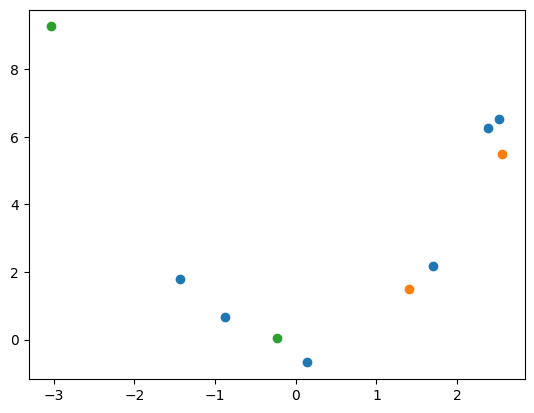

(6, 2, 2)

In [211]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

N = 10
seed = 123

X = np.array([[i] for  i in (np.linspace(-3,3,N) + np.random.normal(0,1,N))])
y = X.flatten() ** 2 + np.random.normal(0,0.5,N)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=seed)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15/0.8, random_state=seed)

plt.scatter(X_train.flatten(),y_train)
plt.scatter(X_valid.flatten(),y_valid)
plt.scatter(X_test.flatten(),y_test)
plt.show()

len(X_train), len(X_test), len(X_valid)

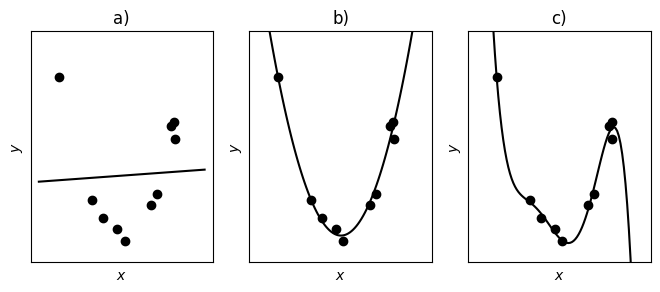

In [260]:
y1 = np.poly1d(np.polyfit(X.flatten(),y,1))
y2 = np.poly1d(np.polyfit(X.flatten(),y,2))
y3 = np.poly1d(np.polyfit(X.flatten(),y,5))
x = np.linspace(-4,4,100)
plt.figure(figsize=(8,3))
plt.subplot(1,3,1)
plt.plot(x,y1(x),'k-')
plt.plot(X.flatten(),y,'ko')
plt.xticks([])
plt.yticks([])
plt.ylim([-2,12])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('a)')
plt.subplot(1,3,2)
plt.plot(x,y2(x),'k-')
plt.plot(X.flatten(),y,'ko')
plt.xticks([])
plt.yticks([])
plt.ylim([-2,12])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('b)')
plt.subplot(1,3,3)
plt.plot(x,y3(x),'k-')
plt.plot(X.flatten(),y,'ko')
plt.xticks([])
plt.yticks([])
plt.ylim([-2,12])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('c)')
plt.show()

1/1 [==============================] - 0s 197ms/step


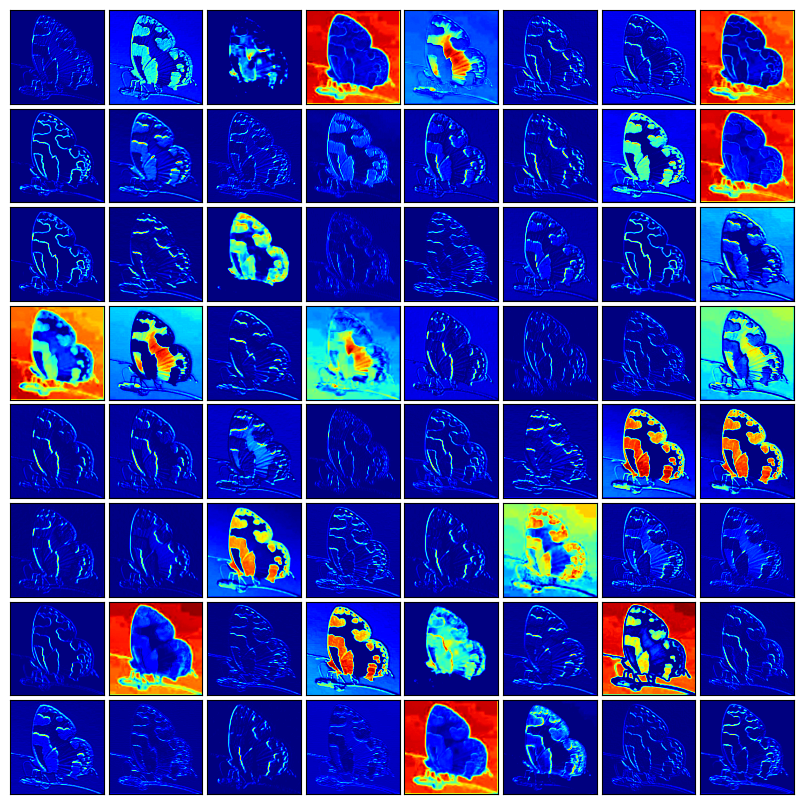

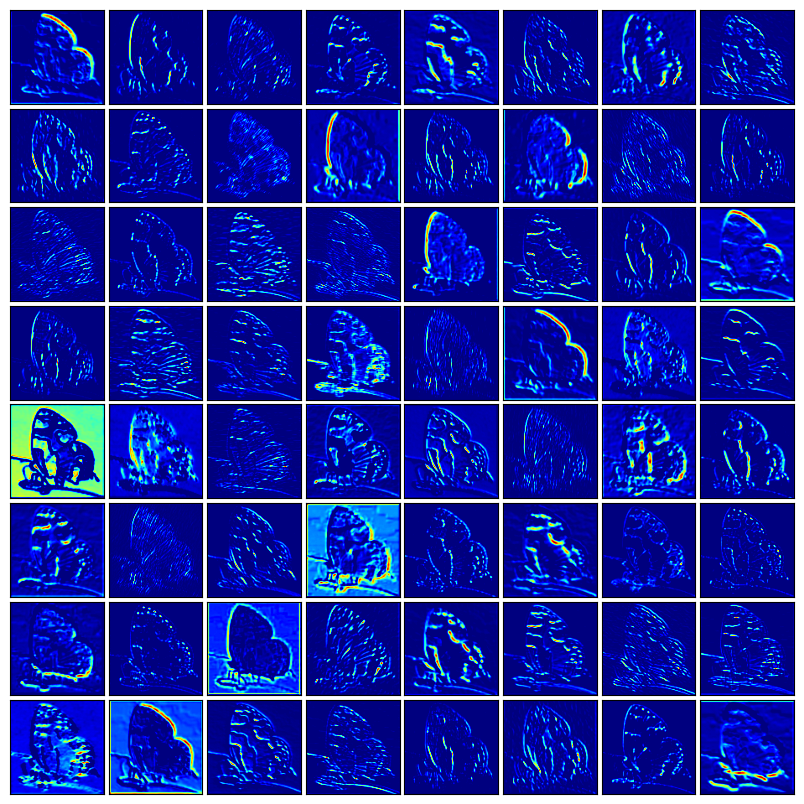

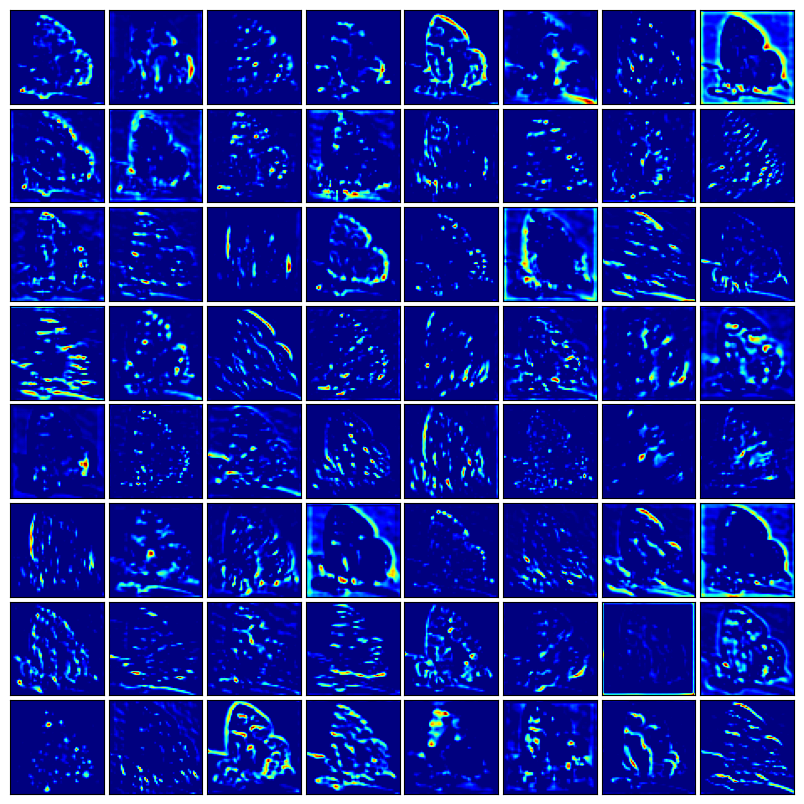

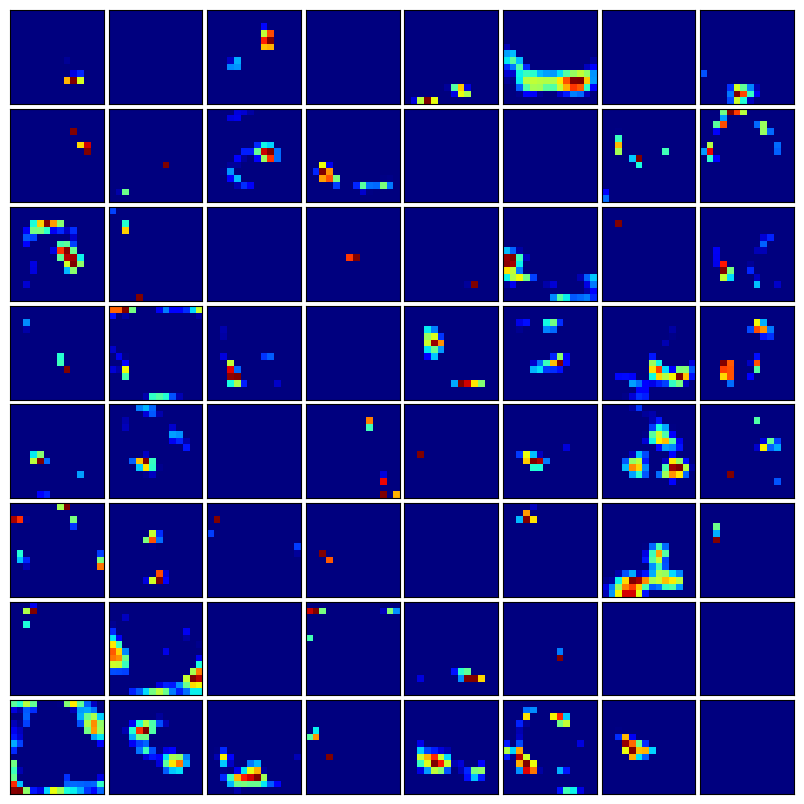

In [5]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('D:\\Master thesis\\MasterThesis-1\\kaggle dataset\caleta elna\\0t3.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
    # plot all 64 maps in an 8x8 squares
    pyplot.figure(figsize=(8,8))
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='jet')
            ix += 1
            # show the figure

    pyplot.subplots_adjust(left=0.01,
                    bottom=0.01,
                    right=0.99,
                    top=0.99,
                    wspace=0.05,
                    hspace=0.05)
    pyplot.show()

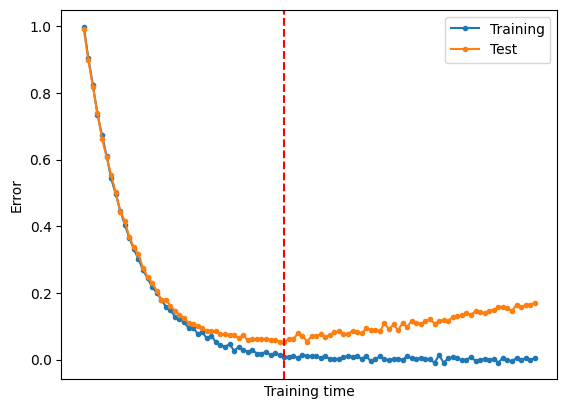

In [102]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2,100)
y = 5 * np.exp(-5*x) + 0.3 * x**1.5
z = 5 * np.exp(-5*x)
y /= 5
y += np.random.normal(0,0.006,100)
z /= 5
z += np.random.normal(0,0.005,100)
x0 = x[np.argmin(y)]

plt.plot(x,z,'.-', label='Training')
plt.plot(x,y,'.-', label='Test')
plt.axvline(x0,c='r',linestyle='--')
plt.xticks([])
plt.xlabel('Training time')
plt.ylabel('Error')
plt.legend()
#plt.annotate('Underfitting region')
plt.show()

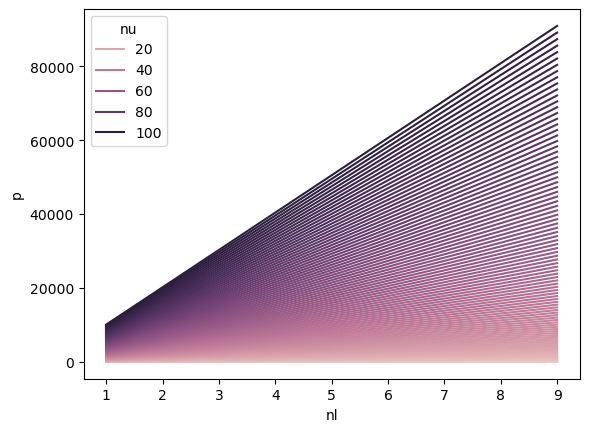

In [23]:
import tensorflow as tf
m = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1,100)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100)
])
def no_params(nl,nu):
    return sum([(nu+1)*nu for _ in range(nl)])

rows = []
for i in range(1,10):
    for j in range(1,101):
        rows.append({'nl':i,'nu':j,'p':no_params(i,j)})

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(rows)
sns.lineplot(data=df, hue='nu',y='p',x='nl')
#plt.yscale('log')
#plt.xscale('log')
plt.show()

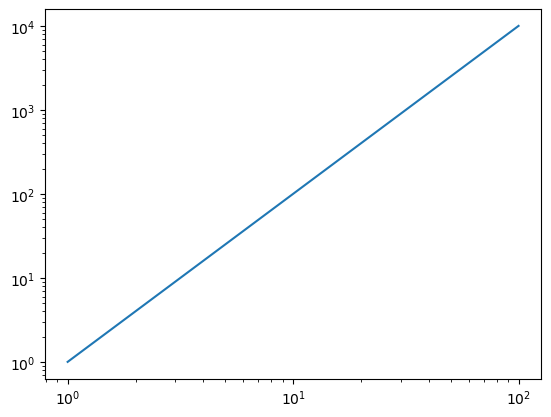

In [19]:
import numpy as np
x = np.linspace(1,100,1000)
y = x ** 2
plt.plot(x,y)
plt.yscale('log')
plt.xscale('log')
plt.show()

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
X = np.linspace(-2,2,2000)
f = np.vectorize(lambda x: np.exp(-x) if x and x >= -1 else 0.0) 
g = lambda x: 3 if x < 0.5 and x > -0.5 else 0.0
g = np.vectorize(g)

plt.plot(X,f(X))
plt.plot(X,g(X))

fg = []

for t in X:
    tmp_x = x[g(x-t) != 0]
    fg += [simpson(f(tmp_x), dx = 4/2000)] 

plt.plot(X,fg)
plt.show()

In [21]:
f(x)[800], x[800]

(1, -0.39919959979990005)

In [1]:
import tf_utils
import tensorflow as tf
import numpy as np
import pathlib
model = tf.keras.models.load_model('D:/Master thesis/saved_models/InceptionV3_(2023-04-08)_1/model')

SEED = 123
IMG_SIZE=(224,224)
BATCH_SIZE=32
# Dataset preparation
train_part, valid_part, test_part = 0.7, 0.15, 0.15

# Loading
kaggle_ds = tf.keras.utils.image_dataset_from_directory(
    'kaggle dataset',
    validation_split=0,
    shuffle=True,
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

nature_ds = tf.keras.utils.image_dataset_from_directory(
    'nature dataset',
    validation_split=0,
    shuffle=True,
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = kaggle_ds.class_names
no_classes = len(class_names)

# Splitting
train_ds, valid_ds, test_ds = tf_utils.get_dataset_partitions(kaggle_ds, train_part, valid_part, test_part, seed=SEED)
print(f'Batches ({BATCH_SIZE} images per batch) in subsets:')
print(f'Train: {len(train_ds)}')
print(f'Validation: {len(valid_ds)}')
print(f'Test: {len(test_ds)}')

# Normalization
kaggle_ds = kaggle_ds.map(tf_utils.normalize)
train_ds = train_ds.map(tf_utils.normalize)
valid_ds = valid_ds.map(tf_utils.normalize)
test_ds = test_ds.map(tf_utils.normalize)
nature_ds = nature_ds.map(tf_utils.normalize)

targets = []
predictions = []
for test_images, test_labels in test_ds.take(-1):
    targets.append(test_labels)
    predictions.append(model.predict(test_images))

m = tf_utils.confusion_matrix(predictions, targets, no_classes)

labels = list(map(lambda x: x.name, pathlib.Path('nature dataset').glob('*')))
true = []
predict = []
for i in range(75):
    for j in range(75):
        true += [labels[i]] * m[i,j]
        predict += [labels[j]] * m[i,j]

from sklearn import metrics


print(metrics.classification_report(true,predict))


Found 10033 files belonging to 75 classes.
Found 138 files belonging to 75 classes.
Batches (32 images per batch) in subsets:
Train: 219
Validation: 47
Test: 48
1/1 [==============================] - 0s 48ms/step
                           precision    recall  f1-score   support

         adelpha iphiclus       1.00      0.96      0.98        26
                aglais io       1.00      1.00      1.00        24
          aglais milberti       1.00      0.88      0.94        26
              anaea aidea       0.89      1.00      0.94        17
           anartia fatima       1.00      0.95      0.98        22
   anthocharis cardamines       1.00      1.00      1.00        22
     astraptes fulgerator       0.95      0.95      0.95        22
          battus philenor       1.00      1.00      1.00        29
              caleta elna       1.00      0.95      0.98        22
        callophrys niphon       1.00      1.00      1.00        24
 carterocephalus palaemon       1.00      0.95   

In [5]:
precisions = [m[i,i]/m[:,i].sum() for i in range(no_classes)]
recalls = [m[i,i]/m[i,:].sum() for i in range(no_classes)]
#f1 = [2 / (1 / precisions[i] + 1 / recalls[i]) for i in range(no_classes)]
f1 = [2 * m[i,i] / (m[:,i].sum() + m[i,:].sum()) for i in range(no_classes)]
for i in range(no_classes):
    print(f'{precisions[i]:.2f} {recalls[i]:.2f}, {f1[i]:.2f}')


1.00 0.96, 0.98
1.00 1.00, 1.00
1.00 0.88, 0.94
0.89 1.00, 0.94
1.00 0.95, 0.98
1.00 1.00, 1.00
0.95 0.95, 0.95
1.00 1.00, 1.00
1.00 0.95, 0.98
1.00 1.00, 1.00
1.00 0.95, 0.97
0.96 1.00, 0.98
1.00 1.00, 1.00
0.96 1.00, 0.98
1.00 0.96, 0.98
0.95 1.00, 0.98
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
0.96 1.00, 0.98
1.00 0.94, 0.97
0.87 0.95, 0.91
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 0.95, 0.97
0.97 0.97, 0.97
1.00 0.95, 0.97
1.00 0.90, 0.95
1.00 0.96, 0.98
1.00 1.00, 1.00
0.86 0.90, 0.88
1.00 1.00, 1.00
1.00 1.00, 1.00
0.92 1.00, 0.96
1.00 0.94, 0.97
0.94 1.00, 0.97
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
0.97 0.94, 0.95
0.92 0.96, 0.94
1.00 1.00, 1.00
1.00 0.94, 0.97
0.91 1.00, 0.95
1.00 1.00, 1.00
0.96 0.96, 0.96
1.00 1.00, 1.00
0.94 1.00, 0.97
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
0.94 1.00, 0.97
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.0

In [14]:
data=\
'''Epoch 1/100
220/220 [==============================] - 158s 664ms/step - loss: 2.0579 - accuracy: 0.4781 - val_loss: 3.5240 - val_accuracy: 0.3597
Epoch 2/100
220/220 [==============================] - 132s 601ms/step - loss: 0.9076 - accuracy: 0.7493 - val_loss: 1.2292 - val_accuracy: 0.6695
Epoch 3/100
220/220 [==============================] - 94s 428ms/step - loss: 0.5493 - accuracy: 0.8398 - val_loss: 1.5302 - val_accuracy: 0.6150
Epoch 4/100
220/220 [==============================] - 131s 596ms/step - loss: 0.4243 - accuracy: 0.8720 - val_loss: 1.1147 - val_accuracy: 0.7287
Epoch 5/100
220/220 [==============================] - 131s 597ms/step - loss: 0.3059 - accuracy: 0.9070 - val_loss: 0.5069 - val_accuracy: 0.8604
Epoch 6/100
220/220 [==============================] - 95s 428ms/step - loss: 0.2717 - accuracy: 0.9154 - val_loss: 1.0459 - val_accuracy: 0.7600
Epoch 7/100
220/220 [==============================] - 94s 429ms/step - loss: 0.2092 - accuracy: 0.9375 - val_loss: 0.9253 - val_accuracy: 0.7932
Epoch 8/100
220/220 [==============================] - 136s 618ms/step - loss: 0.2007 - accuracy: 0.9403 - val_loss: 0.5965 - val_accuracy: 0.8823
Epoch 9/100
220/220 [==============================] - 97s 442ms/step - loss: 0.1553 - accuracy: 0.9527 - val_loss: 0.9370 - val_accuracy: 0.8138
Epoch 10/100
220/220 [==============================] - 138s 626ms/step - loss: 0.1636 - accuracy: 0.9486 - val_loss: 0.4789 - val_accuracy: 0.8923
Epoch 11/100
220/220 [==============================] - 98s 444ms/step - loss: 0.1109 - accuracy: 0.9663 - val_loss: 0.5097 - val_accuracy: 0.8816
Epoch 12/100
220/220 [==============================] - 98s 445ms/step - loss: 0.1474 - accuracy: 0.9556 - val_loss: 2.9187 - val_accuracy: 0.5645
Epoch 13/100
220/220 [==============================] - 138s 626ms/step - loss: 0.1382 - accuracy: 0.9587 - val_loss: 0.4143 - val_accuracy: 0.9082
Epoch 14/100
220/220 [==============================] - 98s 445ms/step - loss: 0.1108 - accuracy: 0.9680 - val_loss: 0.4492 - val_accuracy: 0.8969
Epoch 15/100
220/220 [==============================] - 137s 623ms/step - loss: 0.0853 - accuracy: 0.9759 - val_loss: 0.3693 - val_accuracy: 0.9202
Epoch 16/100
220/220 [==============================] - 98s 445ms/step - loss: 0.1281 - accuracy: 0.9638 - val_loss: 0.6907 - val_accuracy: 0.8590
Epoch 17/100
220/220 [==============================] - 98s 446ms/step - loss: 0.1050 - accuracy: 0.9674 - val_loss: 0.4150 - val_accuracy: 0.8983
Epoch 18/100
220/220 [==============================] - 98s 447ms/step - loss: 0.1152 - accuracy: 0.9668 - val_loss: 0.4186 - val_accuracy: 0.9036
Epoch 19/100
220/220 [==============================] - 100s 453ms/step - loss: 0.1168 - accuracy: 0.9645 - val_loss: 0.5440 - val_accuracy: 0.8637
Epoch 20/100
220/220 [==============================] - 137s 623ms/step - loss: 0.1233 - accuracy: 0.9638 - val_loss: 0.3256 - val_accuracy: 0.9342
Epoch 21/100
220/220 [==============================] - 97s 442ms/step - loss: 0.0505 - accuracy: 0.9852 - val_loss: 0.4446 - val_accuracy: 0.9195
Epoch 22/100
220/220 [==============================] - 136s 617ms/step - loss: 0.0383 - accuracy: 0.9893 - val_loss: 0.3058 - val_accuracy: 0.9415
Epoch 23/100
220/220 [==============================] - 97s 442ms/step - loss: 0.0403 - accuracy: 0.9880 - val_loss: 0.3495 - val_accuracy: 0.9302
Epoch 24/100
220/220 [==============================] - 98s 444ms/step - loss: 0.1381 - accuracy: 0.9624 - val_loss: 0.8142 - val_accuracy: 0.8444
Epoch 25/100
220/220 [==============================] - 98s 446ms/step - loss: 0.0942 - accuracy: 0.9731 - val_loss: 0.6185 - val_accuracy: 0.8903
Epoch 26/100
220/220 [==============================] - 98s 448ms/step - loss: 0.0955 - accuracy: 0.9697 - val_loss: 0.4314 - val_accuracy: 0.9176
Epoch 27/100
220/220 [==============================] - 99s 448ms/step - loss: 0.1198 - accuracy: 0.9637 - val_loss: 0.8314 - val_accuracy: 0.8610
Epoch 28/100
220/220 [==============================] - 138s 629ms/step - loss: 0.0745 - accuracy: 0.9776 - val_loss: 0.2962 - val_accuracy: 0.9428
Epoch 29/100
220/220 [==============================] - 137s 623ms/step - loss: 0.0376 - accuracy: 0.9895 - val_loss: 0.2649 - val_accuracy: 0.9528
Epoch 30/100
220/220 [==============================] - 137s 624ms/step - loss: 0.0143 - accuracy: 0.9969 - val_loss: 0.2325 - val_accuracy: 0.9574
Epoch 31/100
220/220 [==============================] - 98s 445ms/step - loss: 0.0120 - accuracy: 0.9967 - val_loss: 0.3605 - val_accuracy: 0.9395
Epoch 32/100
220/220 [==============================] - 98s 447ms/step - loss: 0.0982 - accuracy: 0.9731 - val_loss: 0.7082 - val_accuracy: 0.8856
Epoch 33/100
220/220 [==============================] - 98s 446ms/step - loss: 0.1141 - accuracy: 0.9650 - val_loss: 0.4848 - val_accuracy: 0.9049
Epoch 34/100
220/220 [==============================] - 99s 450ms/step - loss: 0.0833 - accuracy: 0.9782 - val_loss: 0.4113 - val_accuracy: 0.9295
Epoch 35/100
220/220 [==============================] - 99s 451ms/step - loss: 0.0632 - accuracy: 0.9821 - val_loss: 0.2990 - val_accuracy: 0.9508
Epoch 36/100
220/220 [==============================] - 99s 450ms/step - loss: 0.0239 - accuracy: 0.9939 - val_loss: 0.3155 - val_accuracy: 0.9461
Epoch 37/100
220/220 [==============================] - 99s 449ms/step - loss: 0.0345 - accuracy: 0.9896 - val_loss: 0.3843 - val_accuracy: 0.9388
Epoch 38/100
220/220 [==============================] - 100s 453ms/step - loss: 0.0392 - accuracy: 0.9880 - val_loss: 0.5065 - val_accuracy: 0.9049
Epoch 39/100
220/220 [==============================] - 100s 455ms/step - loss: 0.0801 - accuracy: 0.9782 - val_loss: 0.7664 - val_accuracy: 0.8703
Epoch 40/100
220/220 [==============================] - 99s 450ms/step - loss: 0.0624 - accuracy: 0.9813 - val_loss: 0.3393 - val_accuracy: 0.9422
Epoch 41/100
220/220 [==============================] - 99s 451ms/step - loss: 0.0460 - accuracy: 0.9869 - val_loss: 0.2914 - val_accuracy: 0.9455
Epoch 42/100
220/220 [==============================] - 98s 445ms/step - loss: 0.0470 - accuracy: 0.9866 - val_loss: 0.8291 - val_accuracy: 0.8637
Epoch 43/100
220/220 [==============================] - 97s 442ms/step - loss: 0.0772 - accuracy: 0.9775 - val_loss: 0.4166 - val_accuracy: 0.9242
Epoch 44/100
220/220 [==============================] - 97s 440ms/step - loss: 0.0526 - accuracy: 0.9856 - val_loss: 0.3474 - val_accuracy: 0.9408
Epoch 45/100
220/220 [==============================] - 97s 441ms/step - loss: 0.0474 - accuracy: 0.9866 - val_loss: 0.3899 - val_accuracy: 0.9388
Epoch 46/100
220/220 [==============================] - 131s 598ms/step - loss: 0.0283 - accuracy: 0.9932 - val_loss: 0.2291 - val_accuracy: 0.9668
Epoch 47/100
220/220 [==============================] - 96s 436ms/step - loss: 0.0140 - accuracy: 0.9966 - val_loss: 0.2684 - val_accuracy: 0.9601
Epoch 48/100
220/220 [==============================] - 96s 437ms/step - loss: 0.0291 - accuracy: 0.9916 - val_loss: 0.4892 - val_accuracy: 0.9195
Epoch 49/100
220/220 [==============================] - 95s 434ms/step - loss: 0.0382 - accuracy: 0.9883 - val_loss: 0.4286 - val_accuracy: 0.9235
Epoch 50/100
220/220 [==============================] - 96s 436ms/step - loss: 0.1101 - accuracy: 0.9708 - val_loss: 0.6073 - val_accuracy: 0.9102
Epoch 51/100
220/220 [==============================] - 96s 437ms/step - loss: 0.0631 - accuracy: 0.9808 - val_loss: 0.4444 - val_accuracy: 0.9222
Epoch 52/100
220/220 [==============================] - 96s 436ms/step - loss: 0.0326 - accuracy: 0.9920 - val_loss: 0.2568 - val_accuracy: 0.9621
Epoch 53/100
220/220 [==============================] - 96s 436ms/step - loss: 0.0117 - accuracy: 0.9967 - val_loss: 0.2372 - val_accuracy: 0.9654
Epoch 54/100
220/220 [==============================] - 96s 436ms/step - loss: 0.0078 - accuracy: 0.9979 - val_loss: 0.2337 - val_accuracy: 0.9661
Epoch 55/100
220/220 [==============================] - 96s 437ms/step - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.2309 - val_accuracy: 0.9668
Epoch 56/100
220/220 [==============================] - 142s 646ms/step - loss: 8.6730e-04 - accuracy: 1.0000 - val_loss: 0.2057 - val_accuracy: 0.9714
Epoch 57/100
220/220 [==============================] - 186s 848ms/step - loss: 1.9887e-04 - accuracy: 1.0000 - val_loss: 0.1998 - val_accuracy: 0.9741
Epoch 58/100
220/220 [==============================] - 243s 1s/step - loss: 1.1034e-04 - accuracy: 1.0000 - val_loss: 0.2004 - val_accuracy: 0.9741
Epoch 59/100
220/220 [==============================] - 238s 1s/step - loss: 8.9187e-05 - accuracy: 1.0000 - val_loss: 0.2015 - val_accuracy: 0.9741
Epoch 60/100
220/220 [==============================] - 236s 1s/step - loss: 6.6147e-05 - accuracy: 1.0000 - val_loss: 0.2031 - val_accuracy: 0.9741'''

x = data.split('\n')[1::2]
x = [i.split(' ') for i in x]
history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}
for line in x:
    history['loss'].append(float(line[7]))
    history['accuracy'].append(float(line[10]))
    history['val_loss'].append(float(line[13]))
    history['val_accuracy'].append(float(line[16]))

class h:
    history = history

import tf_utils
tf_utils.plot_history(h())


(<Figure size 800x400 with 2 Axes>,
 [<Axes: title={'center': 'Training and validation accuracy'}, xlabel='Epoch', ylabel='Accuracy'>,
  <Axes: title={'center': 'Training and validation loss'}, xlabel='Epoch', ylabel='Loss'>])

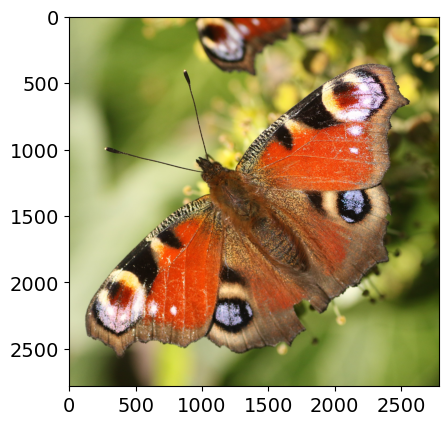

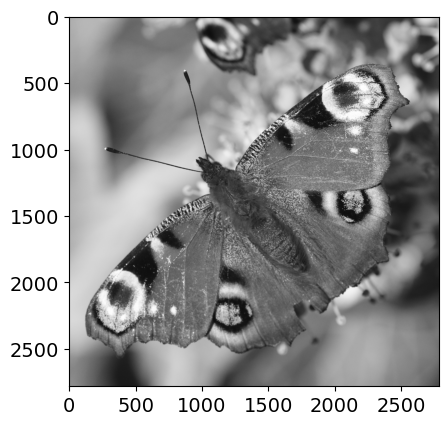

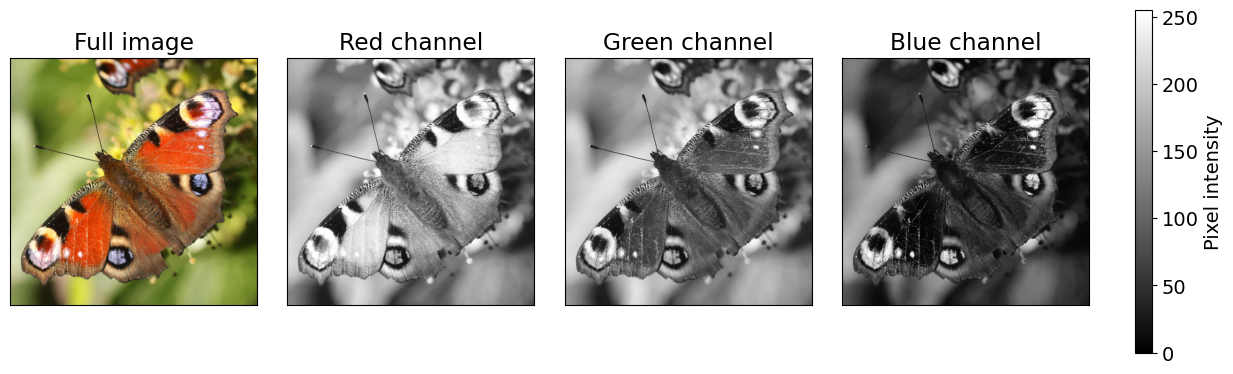

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import albumentations as A
from tf_utils import transform_image

img = plt.imread('nature dataset/aglais io/5.jpg')

plt.imshow(img)
plt.show()

img2 = transform_image(img, A.ToGray(True))

plt.imshow(img2)
plt.show()

fig, axes = plt.subplots(1, 4, sharey=True, figsize=(12,5))
fig.tight_layout(pad=0.05)
plt.rcParams.update({'font.size': 14})
axes[0].imshow(img)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_title('Full image')
t = ['Red', 'Green', 'Blue']
for i in range(3):
    c = axes[i+1].imshow(img[:,:,i], cmap='gray')
    axes[i+1].set_xticks([])
    axes[i+1].set_yticks([])
    axes[i+1].set_title(f'{t[i]} channel')

fig.colorbar(c, ax=axes, label='Pixel intensity',fraction=0.015, pad=0.04)
plt.show()

In [81]:
import albumentations as A
import matplotlib.pyplot as plt
from cv2 import BORDER_REPLICATE
from tf_utils import transform_image
from pathlib import Path
import numpy as np

brightness_params = np.linspace(-0.9, 0.9, 19)
contrast_params = np.linspace(-0.9, 0.9, 19)
gamma_params = np.logspace(0, 4, 19)
gauss_noise_params = np.logspace(-3, 1, 19)
gauss_blur_params = np.arange(1, 39, 2)
motion_blur_params = np.array(list(map(lambda x: x if x % 2 == 1 else x - 1, np.linspace(3, 100, 19).astype(int))))
image_compression_params = [1,2,3,4,5,6,7,8,9,10,13,17,22,28,36,46,60,78,100]
downscale_params = np.logspace(-2, 0, 19, endpoint=False)
rotation_params = np.linspace(0, 360, 19, endpoint=False, dtype=int)

from cv2 import BORDER_REPLICATE
plt.rcParams.update({'font.size': 20})

img = plt.imread('nature dataset/favonius quercus/2.jpg')
img = A.to_float(img)

params = [0, 45, 90, 180, 235]
sym = '$\\varphi$'


fig, axes = plt.subplots(1, 5)
fig.set_size_inches(20,5)
fig.tight_layout(pad=0)
for i in range(5):
    p = params[i]
    new_img = transform_image(img, A.Rotate(limit=(p,p), border_mode=BORDER_REPLICATE, always_apply=True))
    axes[i].imshow(new_img)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(f'{sym}$={p:3.0f}^\circ$')

plt.show()

In [10]:
import numpy as np
import pandas as pd
import pathlib as p

kaggle_paths = p.Path('kaggle dataset').glob('*')
nature_paths = p.Path('nature dataset').glob('*')
d = []
for k_path, n_path in zip(kaggle_paths, nature_paths):
    assert k_path.name == n_path.name
    d.append({'name': k_path.name, 'kaggle': len(list(k_path.glob('*'))), 'nature': len(list(n_path.glob('*')))})

df = pd.DataFrame(d)

print('Number of classes:')
print(df[df['kaggle'] > 0].shape[0], df[df['nature'] > 0].shape[0])

print('Total')
print(df[df.kaggle > 0].kaggle.sum(), df[df.nature > 0].nature.sum())

print('Mean')
print(df[df.kaggle > 0].kaggle.mean(), df[df.nature > 0].nature.mean())

print('Std')
print(df[df.kaggle > 0].kaggle.std(), df[df.nature > 0].nature.std())

print('Min')
print(df[df.kaggle > 0].kaggle.min(), df[df.nature > 0].nature.min())

print('Max')
print(df[df.kaggle > 0].kaggle.max(), df[df.nature > 0].nature.max())

print('Median')
print(df[df.kaggle > 0].kaggle.median(), df[df.nature > 0].nature.median())

Number of classes:
75 10
Total
10034 138
Mean
133.78666666666666 13.8
Std
13.300369161035336 11.043348928452618
Min
112 2
Max
197 35
Median
133.0 11.0


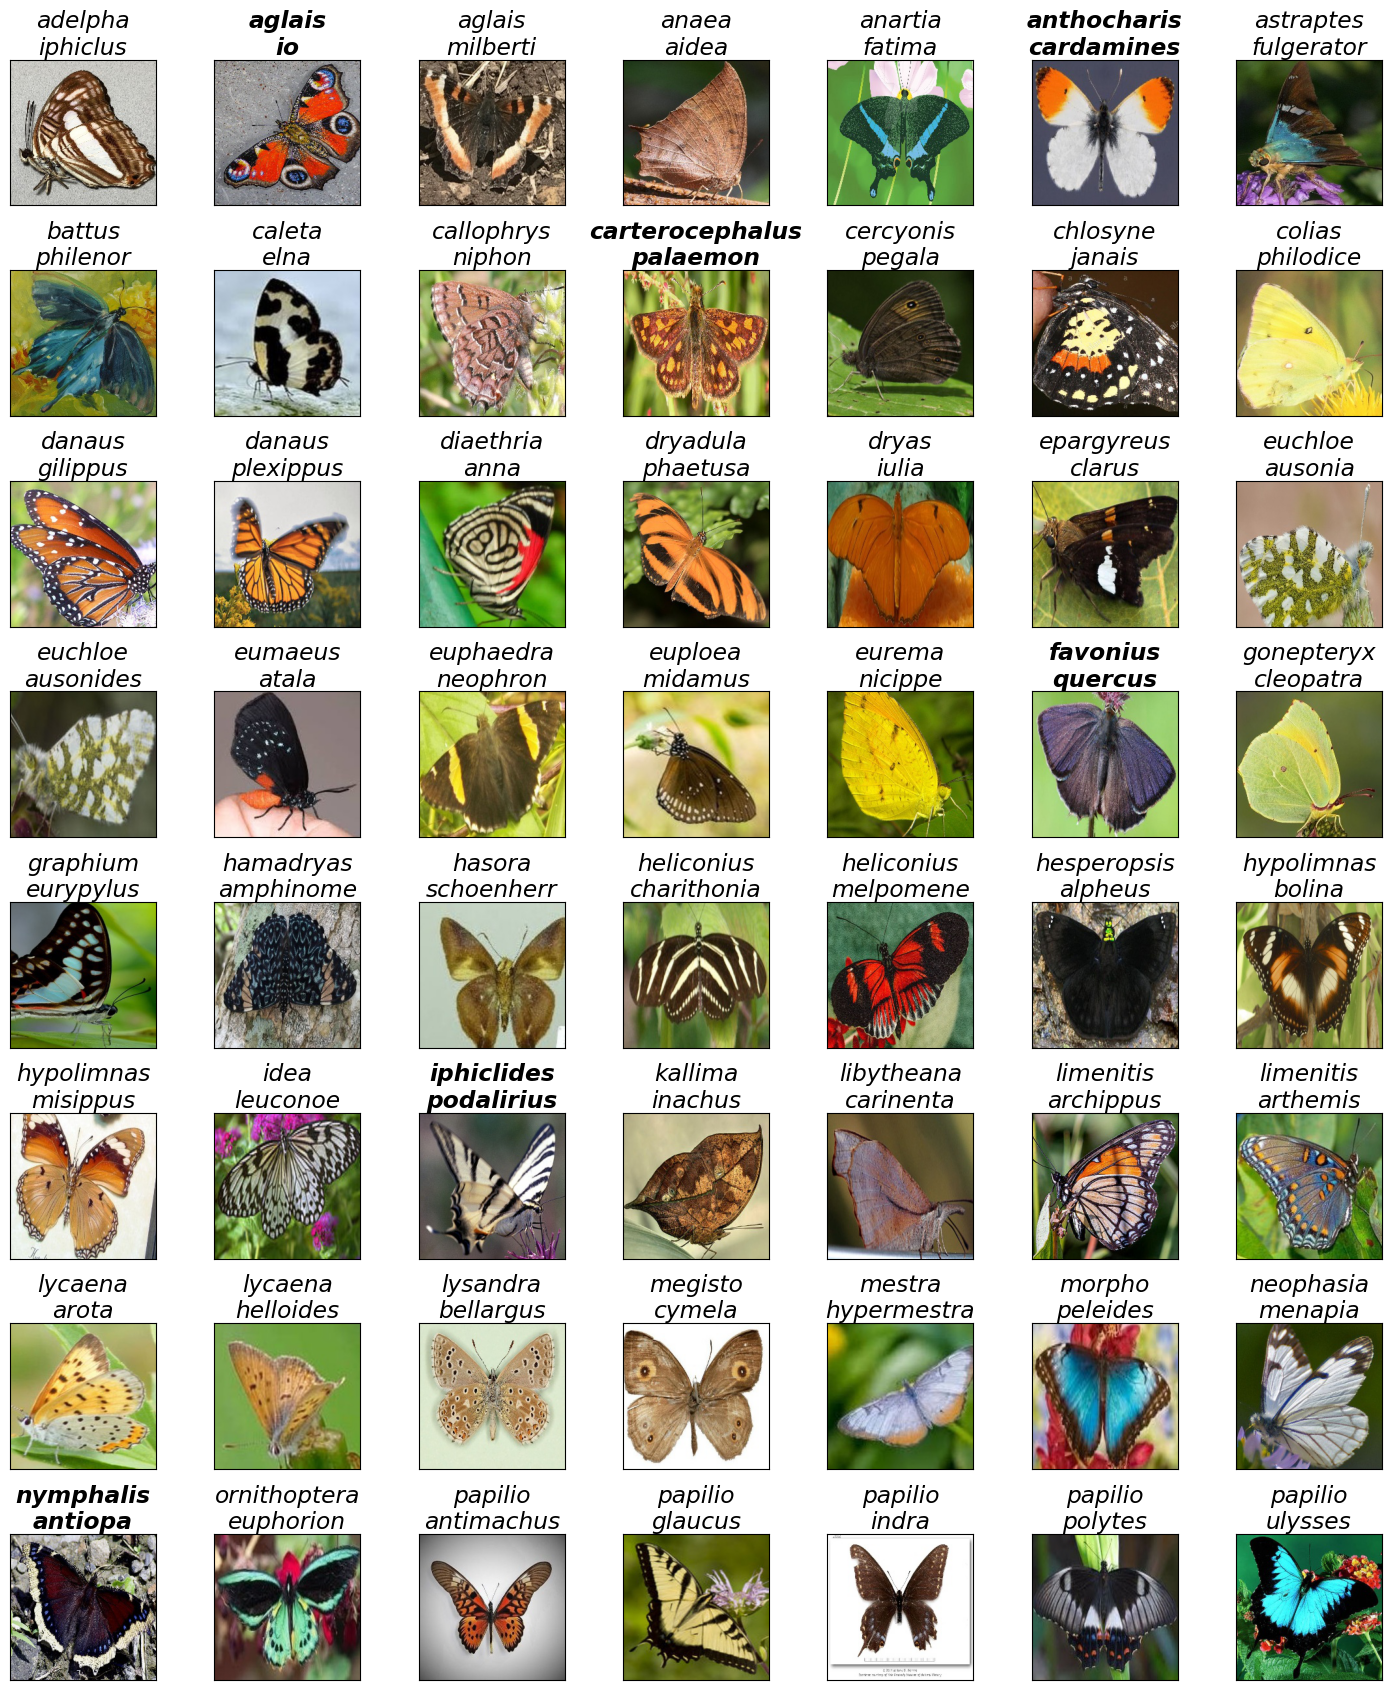

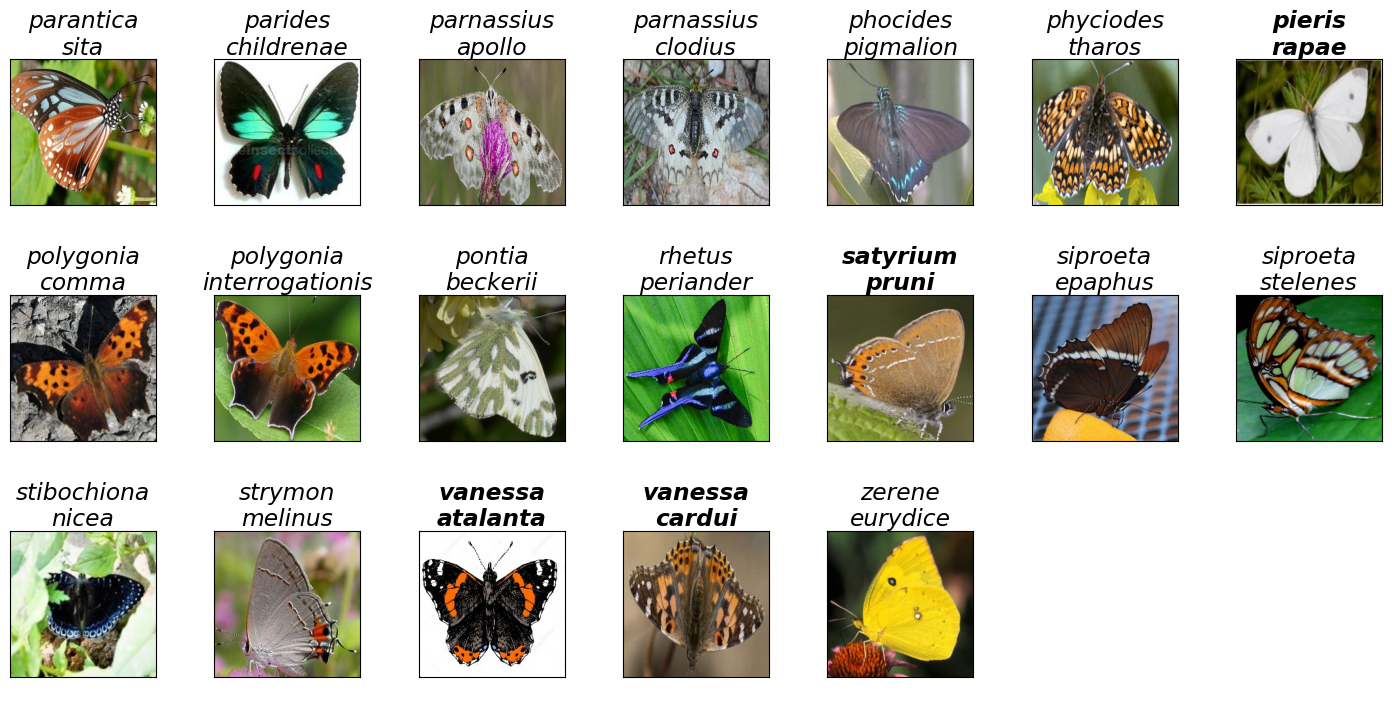

In [15]:
import matplotlib.pyplot as plt
from pathlib import Path
from random import randint
from random import seed

seed(123)

paths = Path('kaggle dataset').glob('*')
paths2 = Path('nature dataset').glob('*')

common = []
names = []
images = []


n1 = 8
m1 = 7
n2 = 3
m2 = 7

plt.rcParams.update({'font.size': 14})

for path, p2 in zip(paths, paths2):
    names.append(path.name)
    tmp = list(path.glob('*'))
    images.append(plt.imread(tmp[randint(0,len(tmp)-1)]))
    if len(list(p2.glob('*'))) > 0:
        common.append(p2.name)

fig, axes = plt.subplots(n1, m1, figsize=(m1*2, n1*2+1))

itr = 0
for i in range(n1):
    for j in range(m1):
        if itr < 75:
            axes[i,j].imshow(images[itr])
            axes[i,j].set_xticks([])
            axes[i,j].set_yticks([])
            w = 'semibold' if names[itr] in common else 'normal'
            axes[i,j].set_title(names[itr].replace(' ', '\n'), style='italic', fontweight=w, wrap=True)
            itr += 1
        else:
            axes[i,j].axis('off')


plt.subplots_adjust(left=0.01,
                    bottom=0.01,
                    right=0.99,
                    top=0.99,
                    wspace=0.4,
                    hspace=0.1)

plt.show()

fig, axes = plt.subplots(n2, m2, figsize=(m2*2, n2*2+1))
for i in range(n2):
    for j in range(m2):
        if itr < 75:
            axes[i,j].imshow(images[itr])
            axes[i,j].set_xticks([])
            axes[i,j].set_yticks([])
            w = 'semibold' if names[itr] in common else 'normal'
            axes[i,j].set_title(names[itr].replace(' ', '\n'), style='italic', fontweight=w, wrap=True)
            itr += 1
        else:
            axes[i,j].axis('off')


plt.subplots_adjust(left=0.01,
                    bottom=0.01,
                    right=0.99,
                    top=0.99,
                    wspace=0.4,
                    hspace=0.1)

plt.show()

1.0